In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [ ]:
# CSV 파일 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/2023_2_ML/20232ML_data/unmon.csv' # replace with your absolute path of data on your drive
data = pd.read_csv(file_path)

In [ ]:
data = data.T

In [ ]:
data.iloc[0, :]

0                  total_pkt_per_user
1         total_outgoing_pkt_per_user
2         total_incoming_pkt_per_user
3          outgoing_pkt_frac_per_user
4          incoming_pkt_frac_per_user
5                 outgoing30_per_user
6                 incoming30_per_user
7            avg_total_burst_per_user
8            std_total_burst_per_user
9            max_total_burst_per_user
10        avg_incoming_burst_per_user
11        std_incoming_burst_per_user
12        min_incoming_burst_per_user
13        avg_outgoing_burst_per_user
14        std_outgoing_burst_per_user
15        max_outgoing_burst_per_user
16                     avg_cumulative
17                     std_cumulative
18                     min_cumulative
19                       avg_interval
20                       std_interval
21                       max_interval
22             avg_pkts_in_fixed_time
23             std_pkts_in_fixed_time
24             min_pkts_in_fixed_time
25             max_pkts_in_fixed_time
26       avg

In [ ]:
# 첫 번째 행 삭제
X = data.drop(data.index[0])  # 첫 번째 행 삭제

X.shape

(29000, 36)

In [ ]:
# 정답 데이터 y 생성
y = np.full(19000,1)
y = np.append(y, np.full(10000, -1))  # -1을 10000번 추가
# 데이터 확인
print(len(y))  # y 배열의 길이 확인

29000


In [ ]:
# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Feature Importance in Decision Tree Model')

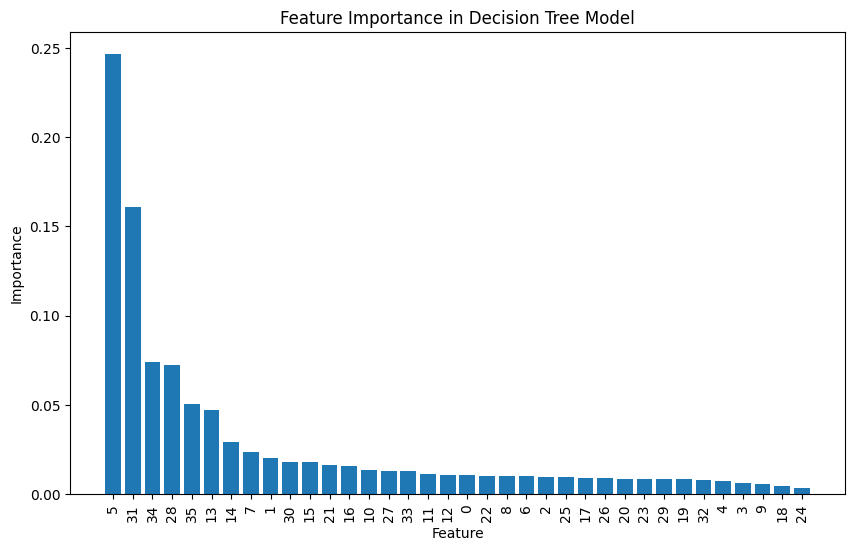

In [ ]:
# 결정 트리 모델 초기화 및 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 확인
feature_importance = model.feature_importances_

# 중요도를 내림차순으로 정렬하여 시각화
sorted_idx = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_columns = X.columns[sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), sorted_feature_importance, align='center')
plt.xticks(range(X.shape[1]), sorted_columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')

In [ ]:
# All features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy: {accuracy}')

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, average = "macro")
recall = recall_score(y_test, y_pred, average = "macro")

print(f'{precision} {recall}')

Random Forest Accuracy: 0.9422413793103448
0.9476849487548518 0.9235799055076355


In [ ]:
# Top5
selected_features_indices = [5, 31, 34, 28, 35]

# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X= X.iloc[:, selected_features_indices]  # 특성 데이터
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy top 5: {accuracy}')

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average = "macro")

print(f'{precision} {recall}')

Random Forest Accuracy top 5: 0.9718965517241379
0.9740932642487047 0.9664695528792995


In [ ]:
# Top25
selected_features_indices = [5, 31, 34, 28, 35, 13, 14, 7, 1, 30, 15, 21, 16, 10, 27, 33, 11, 12, 0, 22, 8 ,6, 2, 25, 17]

# 데이터 표준화 (Standard Scaling)
scaler = StandardScaler()

X = data.drop(data.index[0])  # 첫 번째 행 삭제
X = X.iloc[:, selected_features_indices]  # 특성 데이터
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest 모델 초기화 및 학습
model = RandomForestClassifier(n_estimators=300, random_state=42)  # 예시로 트리 개수는 100으로 설정
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Random Forest Accuracy top 25: {accuracy}')

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred,)
recall = recall_score(y_test, y_pred)

print(f'{precision} {recall}')

Random Forest Accuracy top 25: 0.9420689655172414
0.9316662540232731 0.984305519225739
